# Praktikum Visi Komputer
## Modul ke-3

## Pemprosesan citra dengan OpenCV

Saat kita bekerja dengan gambar/image/citra, bisa saja kita perlu memproses citra seperti mempertajam citra, menggunakan filter, menggabungkan citra.

### Konversi warna 

OpenCV memiliki banyak sekali fungsi yang berkaitan dengan warna. Ada model warna yang cocok untuk perangkat input seperti camera, ada yang cocok untuk perangkat output seperti TV, printer, layar komputer. Namun terdapat 3 model warna yang umum digunakan yaitu:
- Grayscale. Grayscale merupakan model yang mengurangi informasi warna menjadi nilai gray. Biasanya setiap piksel pada image grayscale direpresentasikan oleh satu nilai 8-bit dalam rentang 0 (hitam) hingga 255 (putih). Bisa digunakan untuk memproses image yang hanya perlu informasi brightness seperti pada deteksi wajah. 
- BGR. BGR adalah model warna blue-green-red, di mana setiap piksel memiliki 3 nilai 8-bit yang merepresentasikan komponen/channel biru/blue, hijau/green dan merah/red. Contoh piksel [0, 0, 0] untuk hitam, [255, 0, 0] untuk biru, [0, 255, 0] untuk hijau, [0, 0, 255] untuk merah, dan [255, 255, 255] untuk putih. 
- HSV. Model HSV menggunakan 3 channel berbeda. Hue merupakan rona atau corak warna, Saturation merupakan intensitas atau kekuatan warna dan value merupakan kecerahan dari warna.

Model warna default pada OpenCV adalah BGR. Model yang digunakan pada komputasi disebut model additive, yang berkaitan dengan cahaya/light. Cahaya memiliki reaksi berbeda dibandingkan lukisan/paint. Nilai [0, 255, 255] bermakna tidak ada biru, hijau penuh dan merah penuh sehingga hasilnya adalah kuning. Tapi pada lukisan, warna hijau dan merah jika dicampur menjadi warna coklat. 

In [1]:
import cv2

#download image di: https://i.im.ge/2021/09/09/QJP3s1.jpg
img = cv2.imread('gambar/input.jpg')
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imshow('Grayscale image', gray_img)
cv2.waitKey()

-1

In [2]:
yuv_img = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
cv2.imshow('YUV image', yuv_img)
cv2.waitKey()

-1

Gambar versi YUV sebelumnya malah menjadi jelek dan tidak jelas. Sebenarnya karena `yuv_img` dalam bentuk array NumPy, kita dapat melakukan slicing dan menampilkan setiap channel secara terpisah.

In [3]:
cv2.imshow('Y channel', yuv_img[:, :, 0])
cv2.imshow('U channel', yuv_img[:, :, 1])
cv2.imshow('V channel', yuv_img[:, :, 2])
cv2.waitKey()

-1

Apabila kita melihat hasil dari pemisahan YUV di atas, channel Y sama dengan citra grayscale, yang merepresentasikan nilai intensitas. Channel U dan V merepresentasikan informasi warna. U proyeksi biru, V proyeksi merah.

In [4]:
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
cv2.imshow('HSV image', hsv_img)
cv2.waitKey()

-1

In [5]:
cv2.imshow('H channel', hsv_img[:, :, 0])
cv2.imshow('S channel', hsv_img[:, :, 1])
cv2.imshow('V channel', hsv_img[:, :, 2])
cv2.waitKey()

-1

### Translasi citra / Image translation

Pada bagian ini, kita akan membahas tentang penggeseran citra. Dalam terminologi visi komputer, hal ini disebut sebagai translasi. Mari kita lihat bagaimana kita bisa melakukannya.


In [42]:
import cv2
import numpy as np

img = cv2.imread('gambar/input.jpg')
num_rows, num_cols = img.shape[:2]
translation_matrix = np.float32([ [1,0,70], [0,1,110] ])
img_translation = cv2.warpAffine(img, translation_matrix, (num_cols, num_rows))
cv2.imshow('Translation', img_translation)
cv2.waitKey()

-1

Operasi translasi pada dasarnya kita menggeser gambar dengan menambahkan/mengurangi koordinat X dan Y. Untuk melakukan hal tersebut, kita perlu membuat matriks transformasi, seperti yang ditunjukkan sebagai berikut:

[![QJZppS.png](https://i.im.ge/2021/09/09/QJZppS.png)](https://im.ge/i/QJZppS)

Di sini, nilai tx dan ty adalah nilai terjemahan X dan Y, yaitu gambar akan digerakkan oleh X unit ke kanan, dan oleh Y unit ke bawah. Jadi setelah kita membuat matriks seperti ini, kita dapat menggunakan fungsi, `warpAffine`, untuk diterapkan pada citra. Argumen ketiga di warpAffine mengacu pada jumlah baris dan kolom pada gambar yang dihasilkan. Sejak jumlah baris dan kolom sama dengan gambar asli, gambar yang dihasilkan menjadi terpotong. Untuk menghindari pemotongan, kita bisa melakukan seperti berikut.
`img_translation = cv2.warpAffine(img, translation_matrix, (num_cols + 70, num_rows + 110))`

In [9]:
#Latihan 1
#Ubah code program sebelumnya lalu ubah translasi citra sehingga menjadi tidak terpotong

import cv2
import numpy as np

img = cv2.imread('gambar/input.jpg')
num_rows, num_cols = img.shape[:2]
translation_matrix = np.float32([ [1,0,70], [0,1,110] ])
img_translation = cv2.warpAffine(img, translation_matrix, (num_cols + 70, num_rows + 110))
cv2.imshow('Translation', img_translation)
cv2.waitKey()

-1

### Rotasi citra / Image rotation

Kita dapat melakukan rotasi citra dengan sudut tertentu. Rotasi merupakan bentuk transformasi. Untuk melakukan rotasi, kita dan kita dapat mencapainya dengan menggunakan transformasi matriks berikut.

[![QJZzaJ.png](https://i.im.ge/2021/09/09/QJZzaJ.png)](https://im.ge/i/QJZzaJ)

Di sini, θ adalah sudut rotasi berlawanan arah jarum jam. OpenCV menyediakan fungsi `getRotationMatrix2D`. Kita dapat menentukan titik di mana gambar akan diputar, sudut rotasi dalam derajat, dan faktor skala untuk gambar. Setelah kita memiliki matriks transformasi, kita dapat menggunakan fungsi `warpAffine` untuk menerapkan matriks ini ke gambar apa pun.

In [10]:
img = cv2.imread('gambar/input.jpg')
num_rows, num_cols = img.shape[:2]

rotation_matrix = cv2.getRotationMatrix2D((num_cols/2, num_rows/2), 30, 1)
img_rotation = cv2.warpAffine(img, rotation_matrix, (num_cols, num_rows))
cv2.imshow('Rotation', img_rotation)
cv2.waitKey()

-1

In [11]:
#Latihan 2
#Ubah code program sebelumnya dengan memperkecil ukuran citra rotasi menjadi setengahnya

img = cv2.imread('gambar/input.jpg')
num_rows, num_cols = img.shape[:2]

rotation_matrix = cv2.getRotationMatrix2D((num_cols/2, num_rows/2), 30, 0.5)
img_rotation = cv2.warpAffine(img, rotation_matrix, (num_cols, num_rows))
cv2.imshow('Rotation', img_rotation)
cv2.waitKey()

-1

In [12]:
#Latihan 3
#Ubah latihan 2, lalu coba ubah rotasi gambar menjadi searah jarum jam

img = cv2.imread('gambar/input.jpg')
num_rows, num_cols = img.shape[:2]

rotation_matrix = cv2.getRotationMatrix2D((num_cols/2, num_rows/2), -30, 0.5)
img_rotation = cv2.warpAffine(img, rotation_matrix, (num_cols, num_rows))
cv2.imshow('Rotation', img_rotation)
cv2.waitKey()

-1

### Mengubah ukuran citra / image scaling

Kita dapat mengubah ukuran citra menggunakan faktor scaling atau bisa saja mengubahnya menjadi ukuran tertentu.


In [15]:
img_scaled = cv2.resize(img,None,fx=1.2, fy=1.2, interpolation = cv2.INTER_LINEAR)
cv2.imshow('Scaling - Linear Interpolation', img_scaled) 

img_scaled = cv2.resize(img,None,fx=1.2, fy=1.2, interpolation = cv2.INTER_CUBIC)
cv2.imshow('Scaling - Cubic Interpolation', img_scaled) 

img_scaled = cv2.resize(img,(450, 400), interpolation = cv2.INTER_AREA)
cv2.imshow('Scaling - Skewed Size', img_scaled) 
cv2.waitKey()

-1

In [16]:
#Kita sudah mencoba banyak proses transformasi citra
#Berikut ini kita akan bermain-main dengan efek tertentu menggunakan image warping

import cv2
import numpy as np
import math

img = cv2.imread('gambar/input.jpg', cv2.IMREAD_GRAYSCALE)
rows, cols = img.shape

#####################
# Vertical wave

img_output = np.zeros(img.shape, dtype=img.dtype)

for i in range(rows):
    for j in range(cols):
        offset_x = int(25.0 * math.sin(2 * 3.14 * i / 180))
        offset_y = 0
        if j+offset_x < rows:
            img_output[i,j] = img[i,(j+offset_x)%cols]
        else:
            img_output[i,j] = 0

cv2.imshow('Input', img)
cv2.imshow('Vertical wave', img_output)

#####################
# Horizontal wave

img_output = np.zeros(img.shape, dtype=img.dtype)

for i in range(rows):
    for j in range(cols):
        offset_x = 0
        offset_y = int(16.0 * math.sin(2 * 3.14 * j / 150))
        if i+offset_y < rows:
            img_output[i,j] = img[(i+offset_y)%rows,j]
        else:
            img_output[i,j] = 0

cv2.imshow('Horizontal wave', img_output)

#####################
# Both horizontal and vertical

img_output = np.zeros(img.shape, dtype=img.dtype)

for i in range(rows):
    for j in range(cols):
        offset_x = int(20.0 * math.sin(2 * 3.14 * i / 150))
        offset_y = int(20.0 * math.cos(2 * 3.14 * j / 150))
        if i+offset_y < rows and j+offset_x < cols:
            img_output[i,j] = img[(i+offset_y)%rows,(j+offset_x)%cols]
        else:
            img_output[i,j] = 0

cv2.imshow('Multidirectional wave', img_output)

#####################
# Concave effectimg_output = np.zeros(img.shape, dtype=img.dtype)

for i in range(rows):
    for j in range(cols):
        offset_x = int(128.0 * math.sin(2 * 3.14 * i / (2*cols)))
        offset_y = 0
        if j+offset_x < cols:
            img_output[i,j] = img[i,(j+offset_x)%cols]
        else:
            img_output[i,j] = 0

cv2.imshow('Concave', img_output)
cv2.waitKey()

-1

In [44]:
#Latihan 4
#Ubah program image warping di atas sehingga image yang digunakan adalah foto selfie sendiri
#Lalu silakan bereksperimen bentuk image warping lainnya

import cv2
import numpy as np
import math

img = cv2.imread('gambar/gambar2.jpg', cv2.IMREAD_GRAYSCALE)
rows, cols = img.shape

#####################
# Vertical wave

img_output = np.zeros(img.shape, dtype=img.dtype)

for i in range(rows):
    for j in range(cols):
        offset_x = int(25.0 * math.sin(2 * 3.14 * i / 180))
        offset_y = 0
        if j+offset_x < rows:
            img_output[i,j] = img[i,(j+offset_x)%cols]
        else:
            img_output[i,j] = 0

cv2.imshow('Input', img)
cv2.imshow('Vertical wave', img_output)

#####################
# Horizontal wave

img_output = np.zeros(img.shape, dtype=img.dtype)

for i in range(rows):
    for j in range(cols):
        offset_x = 0
        offset_y = int(16.0 * math.sin(2 * 3.14 * j / 150))
        if i+offset_y < rows:
            img_output[i,j] = img[(i+offset_y)%rows,j]
        else:
            img_output[i,j] = 0

cv2.imshow('Horizontal wave', img_output)

#####################
# Both horizontal and vertical

img_output = np.zeros(img.shape, dtype=img.dtype)

for i in range(rows):
    for j in range(cols):
        offset_x = int(20.0 * math.sin(2 * 3.14 * i / 150))
        offset_y = int(20.0 * math.cos(2 * 3.14 * j / 150))
        if i+offset_y < rows and j+offset_x < cols:
            img_output[i,j] = img[(i+offset_y)%rows,(j+offset_x)%cols]
        else:
            img_output[i,j] = 0

cv2.imshow('Multidirectional wave', img_output)

#####################
# Concave effectimg_output = np.zeros(img.shape, dtype=img.dtype)

for i in range(rows):
    for j in range(cols):
        offset_x = int(128.0 * math.sin(2 * 3.14 * i / (2*cols)))
        offset_y = 0
        if j+offset_x < cols:
            img_output[i,j] = img[i,(j+offset_x)%cols]
        else:
            img_output[i,j] = 0

cv2.imshow('Concave', img_output)
cv2.waitKey()

-1

### Fourier transform

Sebagian besar pemrosesan yang kita akan terapkan pada citra dan video di OpenCV melibatkan konsep transformasi Fourier / Fourier Transform (FT). Joseph Fourier adalah seorang matematikawan berkebangsaan Prancis yang menemukan dan mempopulerkan banyak konsep matematika abad ke-18. Dia mempelajari bentuk fisika dari panas dan memodelkan secara matematika semua hal yang dapat diwakili oleh gelombang fungsi (waveform). Secara khusus, ia mengamati bahwa semua bentuk gelombang hanyalah jumlah dari sinusoida sederhana dari frekuensi yang berbeda.

Dengan kata lain, bentuk gelombang yang kita amati di sekitar kita adalah jumlah dari bentuk gelombang yang lain. Konsep ini sangat berguna saat memanipulasi citra karena memungkinkan kita untuk mengidentifikasi wilayah dalam citra di mana terjadi perubahan sinyal (seperti nilai piksel citra) yang banyak, ataupun perubahannya yang tidak terlalu dramatis. Kita kemudian dapat menandai ini sebagai noise atau bisa sebagai region of interest (ROI), bisa sebagai backgroud atau bisa sebagai foreground, dan lainnya. 

OpenCV mengimplementasikan sejumlah algoritma yang memungkinkan kita untuk memproses citra dan memahami data yang terkandung di dalamnya. Hal tersebut juga diimplementasikan kembali pada NumPy sehingga dapat memudahkan kita dalam memproses citra/image. NumPy memiliki modul/package Fast Fourier Transform (FFT), yang berisi method fft2. Method ini memungkinkan kita untuk menghitung transformasi Fourier diskrit/ Discrete Fourier Transform (DFT) dari suatu citra/image.

Transformasi Fourier (FT) adalah dasar dari banyak algoritma yang digunakan untuk pemprosesan citra, seperti deteksi tepi (edge detection) atau deteksi garis dan bentuk. Sebelumnya, mari kita lihat dua konsep yang berhubungan dengan transformasi Fourier dalam membentuk dasar dari operasi pemrosesan citra, yaitu HPF dan LPF.

#### HPF dan LPF

HPF (High-Pass Filter) adalah filter yang memeriksa kawasan citra dan meningkatkan intensitas piksel tertentu berdasarkan perbedaan intensitas piksel di sekitarnya. High-Pass Filter (HPF) digunakan untuk mempertahankan titik yang berbeda dengan titik-titik tetangganya (proses deteksi tepi). HPF merupakan suatu bentuk filter yang mengambil data pada frekuensi tinggi dan membuang data pada frekuensi rendah.

Contohnya pada kernel berikut:

[![QJZJ1z.png](https://i.im.ge/2021/09/09/QJZJ1z.png)](https://im.ge/i/QJZJ1z)

*Kernel adalah sekumpulan bobot yang diterapkan ke suatu kawasan dari sumber citra untuk menghasilkan satu piksel dalam gambar tujuan. Misalnya, jika kita memanggil fungsi OpenCV dengan parameter untuk menentukan ukuran kernel atau ksize dari 7, ini berarti bahwa 49 (7 x 7) piksel sumber dipertimbangkan saat menghasilkan setiap piksel tujuan. Kita dapat menganggap kernel sebagai sepotong kaca buram bergerak di atas sumber citra dan membiarkan campuran cahaya tersebar melewatinya.*

Kernel sebelumnya memberi kita perbedaan rata-rata dalam intensitas antara piksel pusat dan semua tetangga horizontal terdekatnya. Jika sebuah piksel menonjol dari piksel sekitarnya, nilai yang dihasilkan akan tinggi. Jenis kernel ini disebut filter high-boost, yang merupakan jenis HPF, dan sangat efektif dalam deteksi tepi (edge detection).

Ciri-ciri kernel dari HPF adalah nilai-nilainya terdiri dari positif, nol dan negatif, dan jumlah dari semua nilainya sama dengan nol.

Low-Pass Filter (LPF) adalah suatu bentuk filter yang mengambil frekuensi rendah dan membuang frekuensi tinggi. LPF digunakan untuk melakukan proses efek blur dan reduksi noise. Ciri-ciri kernel dari LPF adalah semua nilainya positif dan jumlah dari semua nilainya sama dengan satu.

In [18]:
import numpy as np
import cv2

In [19]:
from scipy import ndimage

kernel_3x3 = np.array([[-1, -1, -1],
                        [-1, 8, -1],
                        [-1, -1, -1]])

kernel_5x5 = np.array([[-1, -1, -1, -1, -1],
                        [-1, 1, 2, 1, -1],
                        [-1, 2, 4, 2, -1],
                        [-1, 1, 2, 1, -1],
                        [-1, -1, -1, -1, -1]])

#download gambar di: https://i.im.ge/2021/09/09/QpEGLF.jpg
img = cv2.imread("gambar/statue_small.jpg", 0)

#konvolusi adalah operasi matematika pada dua fungsi yang menghasilkan fungsi ketiga 
#yang menyatakan bagaimana bentuk yang satu diubah oleh yang lain.
#NumPy juga memiliki method convolve tapi untuk one-dimensional array
#method convolve pada ndimage dari SciPy dapat digunakan pada multidimensional array
k3 = ndimage.convolve(img, kernel_3x3)
k5 = ndimage.convolve(img, kernel_5x5)

#Gaussian blur (juga dikenal sebagai Gaussian smoothing) adalah hasil dari pengaburan gambar 
#oleh fungsi Gaussian. Ini adalah efek yang banyak digunakan dalam software grafis, 
#biasanya untuk mengurangi noise gambar dan mengurangi detail.
#Gaussian blur merupakan salah satu jenis dari LPF
blurred = cv2.GaussianBlur(img, (17,17), 0)
g_hpf = img - blurred

cv2.imshow("3x3", k3)
cv2.imshow("5x5", k5)
cv2.imshow("blurred", blurred)
cv2.imshow("g_hpf", g_hpf)
cv2.waitKey()
cv2.destroyAllWindows()

#### Deteksi tepi

Tepi memainkan peran utama dalam penglihatan manusia dan komputer. Kita sebagai manusia dapat dengan mudah mengenali banyak jenis objek dan posenya hanya dengan melihat siluet backlit atau sketsa kasar. Tepi membantu kita dalam mengekstrak informasi, mengenali objek, dan memulihkan geometri dan sudut pandang. Tepi biasanya muncul karena diskontinuitas dalam permukaan normal, kedalaman, warna permukaan, dan iluminasi.

Tujuan dari deteksi tepi adalah untuk mengidentifikasi perubahan mendadak (diskontinuitas) pada suatu citra. Secara intuitif, sebagian besar informasi semantik dan bentuk dari citra dapat dikodekan pada tepinya.

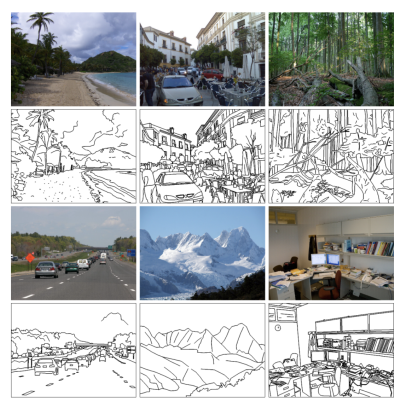

OpenCV menyediakan banyak filter pencarian tepi, seperti `Laplacian`, `Sobel`, dan `Scharr`. Filter ini seharusnya mengubah daerah non-tepi menjadi hitam dan mengubah daerah tepi menjadi warna putih atau warna jenuh. Namun, filter tersebut cenderung salah dalam mengidentifikasi kebisingan (noise) sebagai tepi. Cacat ini dapat dikurangi dengan mengaburkan gambar sebelum mencoba menemukan tepinya. OpenCV juga menyediakan banyak filter blur, termasuk `blur` (simple average), `medianBlur`, dan `GaussianBlur`. Argumen untuk filter pencarian tepi dan pengaburan/blur bervariasi tetapi selalu menyertakan ksize, yaitu bilangan bulat ganjil yang mewakili lebar dan tinggi (dalam piksel) dari kernel filter.

Untuk pengaburan/blur, kita akan menggunakan `medianBlur`, yang efektif menghilangkan noise pada video digital, terutama pada gambar berwarna. Untuk pencarian tepi, mari gunakan `Laplacian`, yang menghasilkan garis tepi tebal, terutama pada gambar skala abu-abu. Setelah menerapkan `medianBlur`, tetapi sebelum menerapkan `Laplacian`, kita harus mengubah gambar dari BGR menjadi grayscale.

Setelah kita mendapatkan hasil `Laplacian`, kita dapat membalikkannya untuk mendapatkan tepi hitam pada latar belakang putih. Kemudian, kita dapat menormalkannya (sehingga nilainya berkisar dari 0 hingga 1) dan kemudian mengalikannya dengan gambar sumber untuk menggelapkan tepinya.

In [27]:
img = cv2.imread("gambar/statue_small.jpg", cv2.IMREAD_COLOR)

blurredSrc = cv2.medianBlur(img, 7) 
graySrc = cv2.cvtColor(blurredSrc, cv2.COLOR_BGR2GRAY)

cv2.Laplacian(graySrc, cv2.CV_8U, graySrc, ksize = 5)

normalizedInverseAlpha = (1.0 / 255) * (255 - graySrc)
channels = cv2.split(img)
for channel in channels:
    channel[:] = channel * normalizedInverseAlpha

    cv2.merge(channels, img)

cv2.imshow("Median dan Laplacia", graySrc)
cv2.waitKey()
cv2.destroyAllWindows()

### Deteksi tepi dengan Canny

Deteksi tepi dengan menggunakan Laplacian masih menimbulkan banyak noise. Untuk mengatasi masalah tersebut, kita dapat menggunakan Canny edge detector. Fungsi Canny ini sangat popular tidak hanya karena efektif, namun juga sangat sederhana penggunaannya pada OpenCV yaitu hanya satu baris saja.


In [28]:
img = cv2.imread("gambar/statue_small.jpg", 0)
cv2.imwrite("gambar/canny.jpg", cv2.Canny(img, 200, 300)) # Canny in one line!
cv2.imshow("canny", cv2.imread("gambar/canny.jpg"))
cv2.waitKey()
cv2.destroyAllWindows()

Hasilnya menampilkan edge/tepi yang sangat jelas sekali. Walaupun penggunaanya hanya 1 baris saja, namun sebenarnya algoritma Canny edge detection ini kompleks. Terdapat 5 langkah proses pada Canny edge detection:
1. Denoise citra dengan filter Gaussian
2. Hitung gradientnya
3. Terapkan non-maximum suppression (NMS) pada tepinya. Ini bermakna, algoritma Canny memilih tepi terbaik dari suatu set tepi yang tumpang tindih. 
4. Terapkan ambang ganda (double threshold) ke semua tepi yang terdeteksi untuk menghilangkan False Positive.
5. Analisis semua tepi dan hubungannya satu sama lain untuk menjaga tepi yang sebenarnya dan membuang tepi yang lemah.

In [39]:
#Latihan 5
#Silakan bereksperimen dengan gambar lainnya (bebas) untuk melakukan deteksi tepi menggunakan Canny

img = cv2.imread("gambar/Image4.jpg", 0)
cv2.imwrite("gambar/canny2.jpg", cv2.Canny(img, 200, 300)) # Canny in one line!
cv2.imshow("canny2", cv2.imread("gambar/canny2.jpg"))
cv2.waitKey()
cv2.destroyAllWindows()

### Deteksi Kontur (contour detection)

Tugas penting lainnya dalam visi komputer adalah deteksi kontur. Kita ingin mendeteksi kontur atau garis luar subjek yang terdapat dalam bingkai gambar atau video. Dan hasil dari deteksi kontur juga digunakan pada operasi lainnya. Operasi-operasi ini diantaranya menghitung bounding polygon, perkiraan bentuk, dan menghitung region of interest (ROI). ROI dapat menyederhanakan interaksi dengan data citra sebab wilayah persegi panjang pada NumPy mudah ditentukan dengan menggunakan irisan array (array slicing). Kita akan banyak menggunakan deteksi kontur dan ROI pada bahasan mengenai deteksi objek (termasuk deteksi wajah) dan pelacakan objek.

Berikut contoh sederhana dari kontur.

In [30]:
import cv2
import numpy as np

img = np.zeros((200, 200), dtype=np.uint8)
img[50:150, 50:150] = 255

ret, thresh = cv2.threshold(img, 127, 255, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

color = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
img = cv2.drawContours(color, contours, -1, (0,255,0), 2)
cv2.imshow("contours", color)
cv2.waitKey()
cv2.destroyAllWindows()

Menentukan kontur pada persegi sangat mudah (sesuai contoh di atas). Namun menentukan kontur pada bentuk irregular, miring dan berotasi adalah challenging. 

#### Bounding box, minimum area rectangle, dan minimum enclosing circle
Dalam aplikasi kehidupan nyata, kita akan sering membuat *the bounding box of the subject*, *its minimum enclosing rectangle*, dan *its enclosing circle*. Fungsi cv2.findContours, bersama dengan beberapa utilitas OpenCV lainnya, membuat pekerjaan ini menjadi sangat mudah untuk dilakukan. 

Seperti pada contoh program di bawah. Pertama, kode berikut membaca gambar dari file, mengubahnya menjadi citra abu-abu, menerapkan ambang batas (threshold) ke citra skala abu-abu, dan menemukan kontur pada gambar threshold.

In [31]:
#Download gambar di https://i.im.ge/2021/09/10/QJJMsp.jpg
img = cv2.pyrDown(cv2.imread("gambar/hammer.jpg", cv2.IMREAD_UNCHANGED))

ret, thresh = cv2.threshold(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), 127, 255, cv2.THRESH_BINARY)
contours, hier = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#Lalu untuk setiap kontur, kita dapat menemukan bounding box, minimum enclosing rectangle, 
#dan minimum enclosing circle
for c in contours:
    # find bounding box coordinates
    x,y,w,h = cv2.boundingRect(c)
    cv2.rectangle(img, (x,y), (x+w, y+h), (0, 255, 255), 2)
    
    # find minimum area
    rect = cv2.minAreaRect(c)
    # calculate coordinates of the minimum area rectangle
    box = cv2.boxPoints(rect)
    # normalize coordinates to integers
    box = np.int0(box)
    # draw contours
    cv2.drawContours(img, [box], 0, (0,0, 255), 3)
    
    # calculate center and radius of minimum enclosing circle
    (x, y), radius = cv2.minEnclosingCircle(c)
    # cast to integers
    center = (int(x), int(y))
    radius = int(radius)
    # draw the circle
    img = cv2.circle(img, center, radius, (0, 255, 0), 2)
    
cv2.drawContours(img, contours, -1, (255, 0, 0), 1)
cv2.imshow("contours", img)
cv2.waitKey()
cv2.destroyAllWindows()

In [32]:
#Latihan 6
#Gunakan code di atas dan lakukan eksperimen pada gambar pada code warping
#Lalu coba eksperimen untuk gambar lainnya (bebas)

img = cv2.pyrDown(cv2.imread("gambar/input.jpg", cv2.IMREAD_UNCHANGED))

ret, thresh = cv2.threshold(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), 127, 255, cv2.THRESH_BINARY)
contours, hier = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#Lalu untuk setiap kontur, kita dapat menemukan bounding box, minimum enclosing rectangle, 
#dan minimum enclosing circle
for c in contours:
    # find bounding box coordinates
    x,y,w,h = cv2.boundingRect(c)
    cv2.rectangle(img, (x,y), (x+w, y+h), (0, 255, 255), 2)
    
    # find minimum area
    rect = cv2.minAreaRect(c)
    # calculate coordinates of the minimum area rectangle
    box = cv2.boxPoints(rect)
    # normalize coordinates to integers
    box = np.int0(box)
    # draw contours
    cv2.drawContours(img, [box], 0, (0,0, 255), 3)
    
    # calculate center and radius of minimum enclosing circle
    (x, y), radius = cv2.minEnclosingCircle(c)
    # cast to integers
    center = (int(x), int(y))
    radius = int(radius)
    # draw the circle
    img = cv2.circle(img, center, radius, (0, 255, 0), 2)
    
cv2.drawContours(img, contours, -1, (255, 0, 0), 1)
cv2.imshow("contours", img)
cv2.waitKey()
cv2.destroyAllWindows()

In [34]:
#Gambar lain

img = cv2.pyrDown(cv2.imread("gambar/gambar2.jpg", cv2.IMREAD_UNCHANGED))

ret, thresh = cv2.threshold(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), 127, 255, cv2.THRESH_BINARY)
contours, hier = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#Lalu untuk setiap kontur, kita dapat menemukan bounding box, minimum enclosing rectangle, 
#dan minimum enclosing circle
for c in contours:
    # find bounding box coordinates
    x,y,w,h = cv2.boundingRect(c)
    cv2.rectangle(img, (x,y), (x+w, y+h), (0, 255, 255), 2)
    
    # find minimum area
    rect = cv2.minAreaRect(c)
    # calculate coordinates of the minimum area rectangle
    box = cv2.boxPoints(rect)
    # normalize coordinates to integers
    box = np.int0(box)
    # draw contours
    cv2.drawContours(img, [box], 0, (0,0, 255), 3)
    
    # calculate center and radius of minimum enclosing circle
    (x, y), radius = cv2.minEnclosingCircle(c)
    # cast to integers
    center = (int(x), int(y))
    radius = int(radius)
    # draw the circle
    img = cv2.circle(img, center, radius, (0, 255, 0), 2)
    
cv2.drawContours(img, contours, -1, (255, 0, 0), 1)
cv2.imshow("contours", img)
cv2.waitKey()
cv2.destroyAllWindows()

#### Convex contours dan algoritma Douglas-Peucker algorithm

Saat bekerja dengan kontur, kita mungkin menemukan subjek dengan beragam bentuk, termasuk bentuk cembung/convex. Bentuk convex adalah bentuk di mana tidak ada dua titik dalam bentuk ini yang garis penghubungnya keluar dari keliling bentuk itu sendiri.

Salah satu fasilitas yang ditawarkan OpenCV untuk menghitung perkiraan batas poligon suatu bentuk adalah `cv2.approxPolyDP`. Fungsi ini membutuhkan tiga parameter:
- Sebuah kontur.
- Nilai epsilon yang mewakili perbedaan maksimum antara kontur asli dan poligon yang didekati (semakin rendah nilainya, semakin dekat nilai perkiraan dengan kontur asli).
- Boolean flag. Jika bernilai True, itu menandakan bahwa poligon tertutup.

Anda mungkin bertanya-tanya, mengapa kita masih memerlukan approximate polygon, padahal sebelumnya kita sudah memiliki kontur. Jawabannya terkait dengan bentuk poligon yang merupakan kumpulan garis lurus. Banyak tugas computer vision menjadi lebih sederhana jika kita dapat mendefinisikan poligon sehingga poligon membatasi wilayah untuk manipulasi dan pemrosesan lebih lanjut.

Mari kita gabungkan kontur asli, kontur approximate poligon, dan convex hull menjadi satu gambar untuk mengamati perbedaan di antara mereka. Untuk mempermudah, kita akan menggambar kontur di atas latar belakang hitam sehingga subjek aslinya tidak terlihat tetapi konturnya tampak.

In [35]:
img = cv2.pyrDown(cv2.imread("gambar/hammer.jpg", cv2.IMREAD_UNCHANGED))

ret, thresh = cv2.threshold(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), 127, 255, cv2.THRESH_BINARY)

contours, hier = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

black = np.zeros_like(img)

for cnt in contours:
    epsilon = 0.01 * cv2.arcLength(cnt,True)
    approx = cv2.approxPolyDP(cnt,epsilon,True)
    hull = cv2.convexHull(cnt)
    cv2.drawContours(black, [cnt], -1, (0, 255, 0), 2)
    cv2.drawContours(black, [approx], -1, (255, 255, 0), 2)
    cv2.drawContours(black, [hull], -1, (0, 0, 255), 2)
    
cv2.imshow("hull", black)
cv2.waitKey()
cv2.destroyAllWindows()

### Deteksi garis, lingkaran, dan bentuk lainnya 

Selain dari deteksi tepi dan deteksi kontur, deteksi garis dan bentuk juga berjalan beriringan. Teori di balik deteksi garis dan bentuk memiliki landasan dalam teknik yang disebut transformasi Hough, ditemukan oleh Richard Duda dan Peter Hart, yang memperluas pekerjaan yang dilakukan oleh Paul Hough pada awal 1960-an.

Pertama-tama, kita coba lakukan deteksi garis. Kita dapat melakukan ini dengan fungsi `HoughLines` atau fungsi `HoughLinesP`. Yang pertama menggunakan transformasi Hough yang standar, sedangkan yang kedua menggunakan transformasi Hough probabilistik. Versi probabilistik disebut demikian karena hanya menganalisis subset dari titik-titik gambar dan memperkirakan probabilitas bahwa semua titik ini termasuk dalam garis yang sama. Implementasi ini merupakan versi optimal dari transformasi Hough standar. HoughLinesP diimplementasikan sehingga mengembalikan dua titik akhir dari setiap segmen garis yang terdeteksi, sedangkan HoughLines diimplementasikan sehingga mengembalikan representasi setiap garis sebagai satu titik dan sudut, tanpa informasi tentang titik akhir.


In [36]:
#Download gambar di https://i.im.ge/2021/09/10/QJJTH1.jpg
img = cv2.imread('gambar/lines.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#Canny bukanlah kewajiban, tetapi gambar yang telah di-denoise dan hanya memiliki tepi adalah 
#sumber ideal untuk transformasi Hough, jadi hal ini akan sering dijumpai.
edges = cv2.Canny(gray, 50, 120)
minLineLength = 20
maxLineGap = 5
lines = cv2.HoughLinesP(edges, 1, np.pi/180.0, 20, minLineLength, maxLineGap)

for x1, y1, x2, y2 in lines[0]:
    cv2.line(img, (x1, y1), (x2, y2), (0,255,0),2)
    
cv2.imshow("edges", edges)
cv2.imshow("lines", img)
cv2.waitKey()
cv2.destroyAllWindows()

OpenCV juga memiliki fungsi untuk mendeteksi lingkaran yang bernama `HoughCircles`. Cara kerjanya mirip dengan HoughLines, bedanya pada circle ada tambahan parameter lainnya. 

In [38]:
#Download gambar di https://i.im.ge/2021/09/10/QJJlmm.jpg
planets = cv2.imread('gambar/planet_glow.jpg')
gray_img = cv2.cvtColor(planets, cv2.COLOR_BGR2GRAY)
gray_img = cv2.medianBlur(gray_img, 5)

circles = cv2.HoughCircles(gray_img,cv2.HOUGH_GRADIENT,1,120, param1=100,param2=30,minRadius=0,maxRadius=0)

circles = np.uint16(np.around(circles))

for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(planets,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(planets,(i[0],i[1]),2,(0,0,255),3)
    
cv2.imwrite("gambar/planets_circles.jpg", planets)
cv2.imshow("HoughCircles", planets)
cv2.waitKey()
cv2.destroyAllWindows()

Implementasi OpenCV dari transformasi Hough terbatas pada deteksi garis dan lingkaran. Namun, kita sebenarnya dapat melakukan deteksi bentuk secara umum dengan `approxPolyDP`. Fungsi ini memungkinkan pendekatan poligon, jadi jika gambar Anda berisi poligon, mereka akan dideteksi secara akurat melalui penggunaan gabungan `cv2.findContours` dan `cv2.approxPolyDP`.